# **TASK: 1  Iris Flower Classification**
● Use measurements of Iris flowers (setosa, versicolor, virginica) as input data.

● Train a machine learning model to classify the species based on these measurements.

● Use libraries like Scikit-learn for easy dataset access and model building.

● Evaluate the model’s accuracy and performance using test data.

● Understand basic classification concepts in machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets
# Load the iris dataset
iris = datasets.load_iris()

In [4]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
display(iris_df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [7]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
iris_df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0


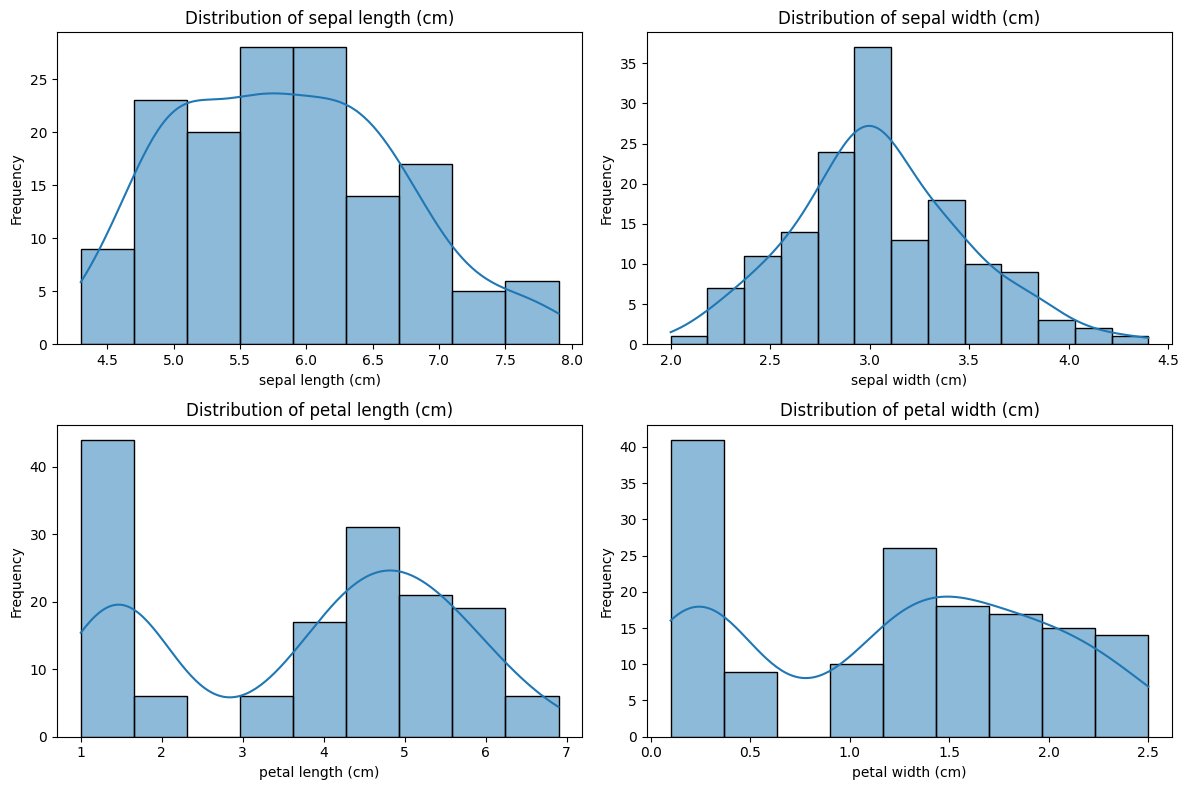

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten() # Flatten the 2x2 grid of axes into a 1D array

for i, col in enumerate(iris_df.columns):
    sns.histplot(data=iris_df, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

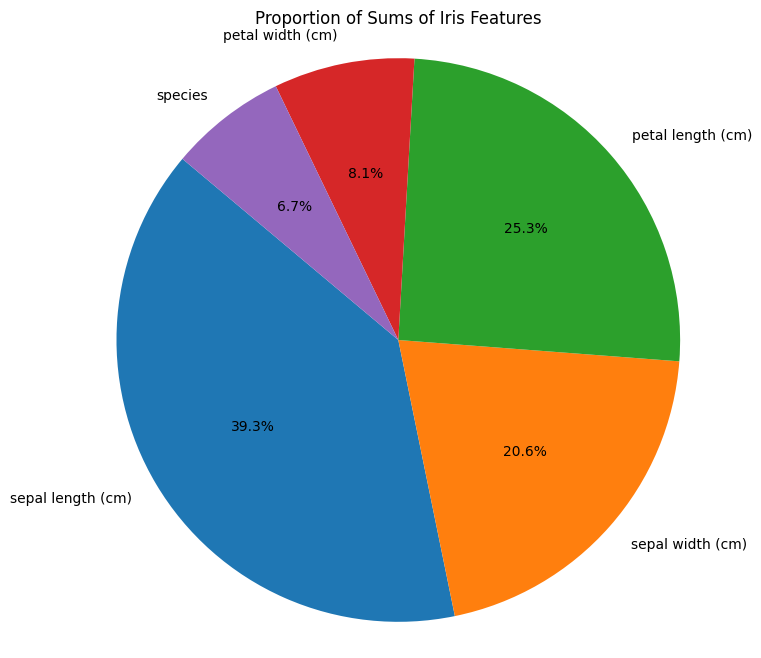

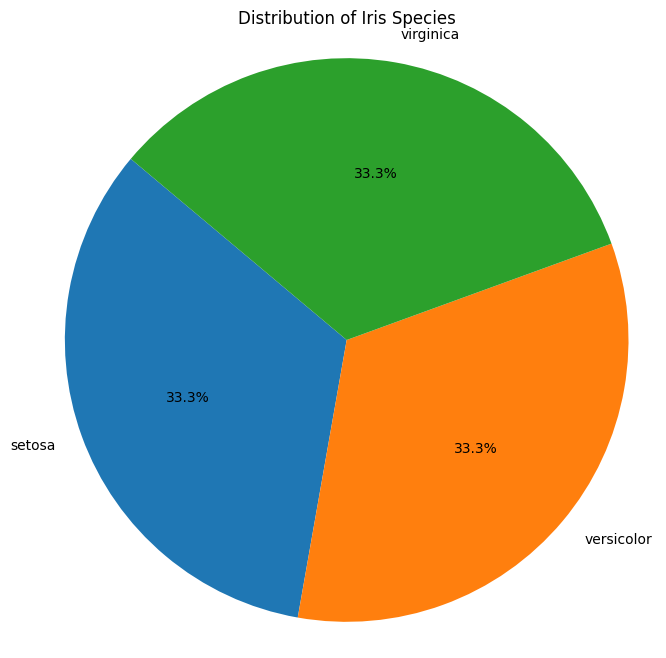

In [12]:
# Calculate the sum of each feature
feature_sums = iris_df.sum()
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(feature_sums, labels=feature_sums.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Sums of Iris Features')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
iris_df['species'] = iris.target
species_counts = iris_df['species'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(species_counts, labels=iris.target_names, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Iris Species')
plt.axis('equal')
plt.show()

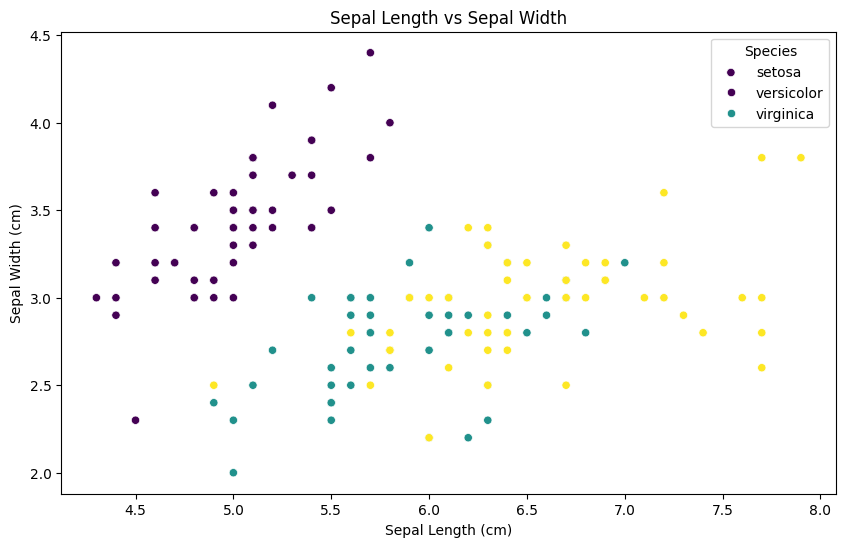

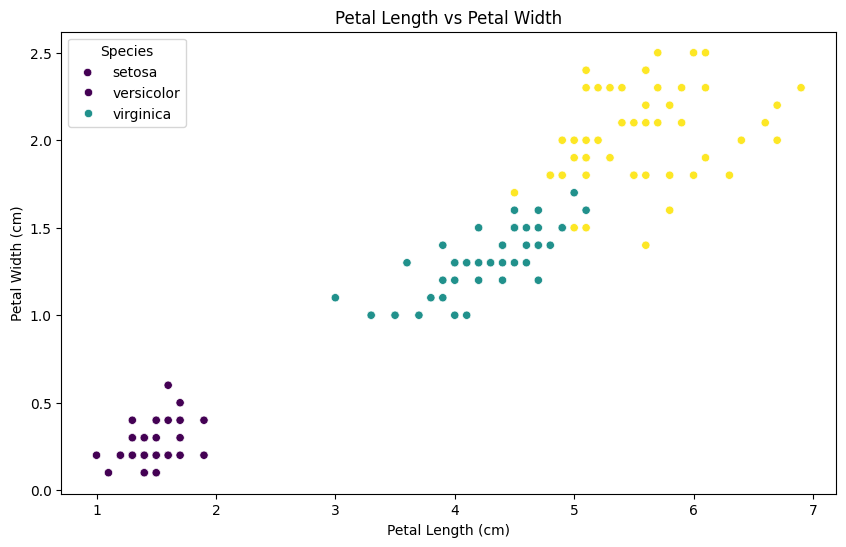

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='species', palette='viridis')
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species', labels=iris.target_names)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='species', palette='viridis')
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species', labels=iris.target_names)
plt.show()

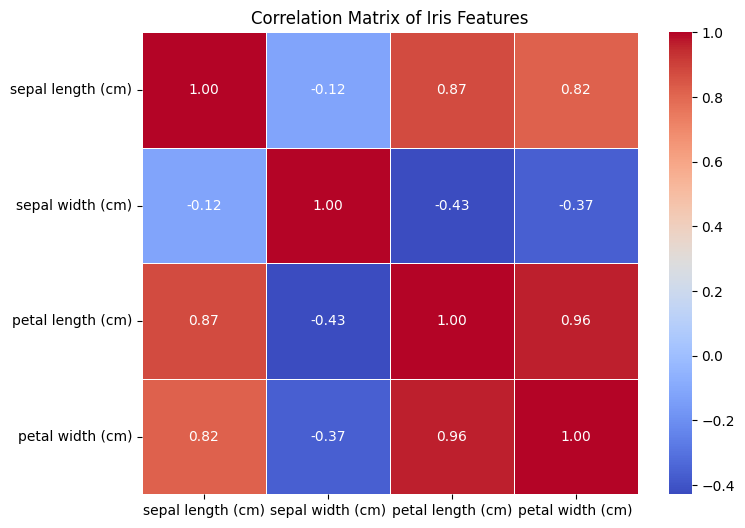

In [14]:
# Calculate the correlation matrix
correlation_matrix = iris_df.drop('species', axis=1).corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Iris Features')
plt.show()

In [17]:
X = iris_df.drop('species', axis=1)
y = iris_df['species']

In [18]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
X.shape

(150, 4)

In [21]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [22]:
y.shape

(150,)

# **# Random Forest Classifier**

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_pred_train = model.predict(X_train_scaled)

In [32]:
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(y_train, y_pred_train):.2f}")
print("\nClassification Report:")
print(classification_report(y_train, y_pred_train))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



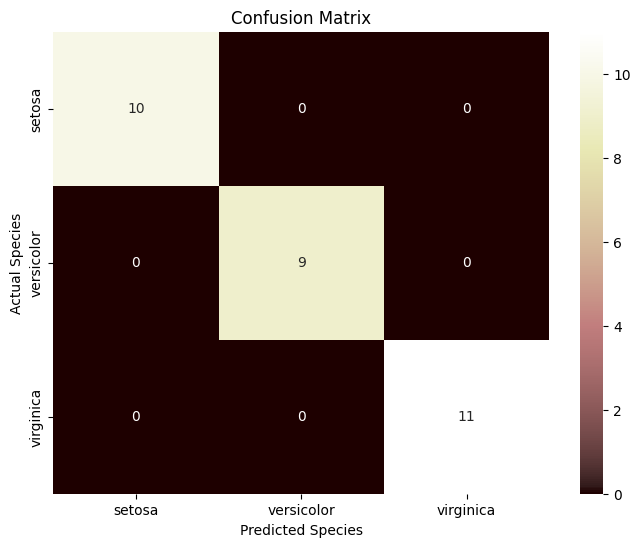

In [34]:
from sklearn.metrics import confusion_matrix

y_pred_test = model.predict(X_test_scaled)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='pink', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()

# **KNeighborsClassifier Model**

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier()

In [37]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

In [38]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy') # 5-fold cross-validation
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]}, scoring='accuracy')

In [50]:
y_pred = best_knn.predict(X_test)

In [39]:
best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [54]:
print("Classification Report:")
print(classification_report(y_test, y_pred_test, target_names=iris.target_names))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



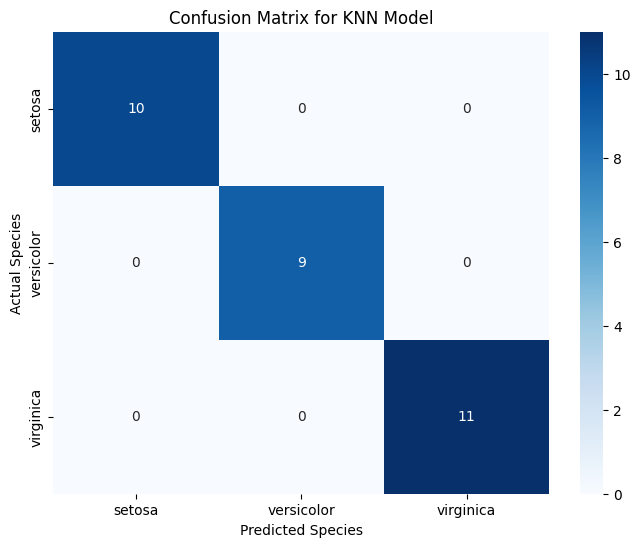

In [55]:
# Calculate the confusion matrix for the KNN model
y_pred_knn = best_knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix for the KNN model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix for KNN Model')
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()

Model Accuracies:
RandomForestClassifier: 1.00
KNeighborsClassifier: 1.00


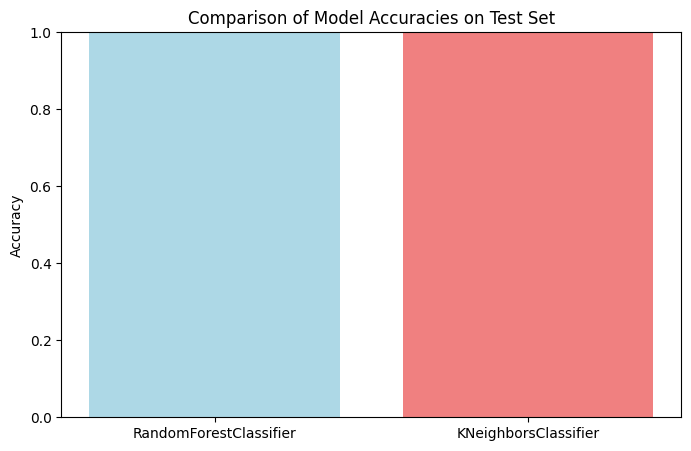

In [56]:
# Get the test accuracy for RandomForestClassifier
rf_accuracy = accuracy_score(y_test, y_pred_test)

# Get the test accuracy for KNeighborsClassifier
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# Create a dictionary to store the accuracies
model_accuracies = {
    'RandomForestClassifier': rf_accuracy,
    'KNeighborsClassifier': knn_accuracy
}

# Print the accuracies
print("Model Accuracies:")
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: {accuracy:.2f}")

# You can also visualize the comparison
plt.figure(figsize=(8, 5))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['lightblue', 'lightcoral'])
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies on Test Set')
plt.ylim(0, 1)
plt.show()

In [ ]:
!pip install -q gradio

import gradio as gr

def classify_iris(sepal_length, sepal_width, petal_length, petal_width):
    # Scale the input features using the same scaler fitted on the training data
    input_features = scaler.transform([[sepal_length, sepal_width, petal_length, petal_width]])

    # Make a prediction using the best KNN model
    prediction = best_knn.predict(input_features)

    # Return the predicted species name
    return iris.target_names[prediction[0]]

# Create Gradio interface
iface = gr.Interface(
    fn=classify_iris,
    inputs=[
        gr.Slider(minimum=0, maximum=10, value=5.1, label="Sepal Length (cm)"),
        gr.Slider(minimum=0, maximum=5, value=3.5, label="Sepal Width (cm)"),
        gr.Slider(minimum=0, maximum=10, value=1.4, label="Petal Length (cm)"),
        gr.Slider(minimum=0, maximum=5, value=0.2, label="Petal Width (cm)")
    ],
    outputs=gr.Label(),
    title="Iris Flower Classifier",
    description="Classify the species of an Iris flower based on its measurements."
)

# Launch the interface
iface.launch(debug=True)

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://28b420336dc9f986f2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-package